In [ ]:
import pandas as pd

In [ ]:
d1 = {'order_id': [1, 2, 3, 4, 5],
      'hour': [15, 16, 17, 15, 15]} 
d2 = {'order_id': [1, 1, 1, 2, 2, 2, 3, 4, 4, 4, 4, 4, 5, 5],
      'product_id': [101, 103, 104, 101, 104, 107, 102, 105, 101, 103, 102, 107, 101, 104]}

In [ ]:
df1 = pd.DataFrame(d1, columns=['order_id', 'hour'])
df1

In [ ]:
df2 = pd.DataFrame(d2, columns=['order_id', 'product_id'])
df2

In [ ]:
# merged df
df = pd.merge(df1, df2, on='order_id')
df

- at hour 15, product_id 101 was ordered 3/10
- at hour 15, product_id 103 and 104 were ordered 2/10

In [ ]:
# grouped df
df_grouped = df.groupby(['hour', 'product_id'], as_index=False).count()
df_grouped.rename(index=str, columns={'order_id': 'order_count'}, inplace=True)
df_grouped 

In [ ]:
# grouped by hour and sorted by count
# will need to use similar logic to sort and get the top 25 values
# df_grouped = df_grouped.sort_values(['hour', 'order_count'], ascending=[True, False])
# df_grouped

In [ ]:
# how to get new column that is the % of total orders for that hour

df_product_percent = df.groupby(['hour', 'product_id']).count()['order_id'] / df.groupby('hour').size() *100
df_product_percent.rename('percent', inplace=True)
# df_product_percent.columns=['percent']
df_product_percent

In [ ]:
# This gets the size for each hour
df.groupby('hour').size()

# testing for all 'Mint Chip' 

In [ ]:
import pandas as pd
mint = pd.read_csv('./data/instacart/mint_chip_orders.csv')

In [ ]:
mint.head()

In [ ]:
mint['pct'] = mint.groupby('product_id')['count'].apply(lambda x: x/x.sum()*100)

In [ ]:
mint.head(24)

testing to get **mean hour each product was purchased in**

mean_hour = sum(order_hour_of_day * n) / sum(n)  # new column mean_hour

In [ ]:
mean_hour = pd.DataFrame({'mean_hour': mint.groupby('product_id').apply(lambda x: sum(x['order_hour_of_day'] * x['count'])/sum(x['count']))}).reset_index()
mean_hour

# Plotting the graph

In [1]:
import pickle

# Retrieve the pickled objects:
with open('./data/instacart/dfs.pickle', 'rb') as f:
    line33, morning, afternoon = pickle.load(f)

In [2]:
# reminder of what the dfs look like
print(line33.head(), morning.head(), sep='\n'*3)

   product_id  order_hour_of_day  count       pct
0          34                  0     23  0.339283
1          34                  1     18  0.265526
2          34                  2     11  0.162266
3          34                  3      5  0.073757
4          34                  4      5  0.073757


   product_id  mean_hour                           product_name
0        9292  11.767279        Half And Half Ultra Pasteurized
1       46562  11.898340  Sweet & Salty Nut Granola Bars Peanut
2       45051  12.004019                                Pub Mix
3       36472  12.049459            Nutri Grain Bars Multi Pack
4       37710  12.059043                              Trail Mix


In [2]:
# break into morning and afternoon groups with product names
morning_pct = line33.merge(morning, on='product_id')
afternoon_pct = line33.merge(afternoon, on='product_id')

In [8]:
morning_pct.sort_values('mean_hour')

,product_id,order_hour_of_day,count,pct,mean_hour,product_name
59,9292,12,200,6.677796,11.767279,Half And Half Ultra Pasteurized
50,9292,2,1,0.033389,11.767279,Half And Half Ultra Pasteurized
51,9292,4,1,0.033389,11.767279,Half And Half Ultra Pasteurized
52,9292,5,4,0.133556,11.767279,Half And Half Ultra Pasteurized
53,9292,6,25,0.834725,11.767279,Half And Half Ultra Pasteurized
54,9292,7,95,3.171953,11.767279,Half And Half Ultra Pasteurized
55,9292,8,323,10.784641,11.767279,Half And Half Ultra Pasteurized
56,9292,9,480,16.026711,11.767279,Half And Half Ultra Pasteurized
57,9292,10,429,14.323873,11.767279,Half And Half Ultra Pasteurized
58,9292,11,292,9.749583,11.767279,Half And Half Ultra Pasteurized


In [3]:
# get list of morning and afteroon product names
morning_product_names = list(morning_pct.sort_values('mean_hour')['product_name'].unique())
morning_product_names = '\n'.join(morning_product_names)
afternoon_product_names = list(afternoon_pct.sort_values('mean_hour', ascending=False)['product_name'].unique())
afternoon_product_names = '\n'.join(afternoon_product_names)

# hack to remove 'Variety Pack' from Orange & Lemon Flavor Variety Pack Sparkling Fruit Beverage
morning_product_names = morning_product_names.replace('Variety Pack ', '')

In [4]:
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Global options
pd.set_option('display.width', 1000)
# sns.set_style("white")
# sns.set_context('poster')

#### try plotting all the products

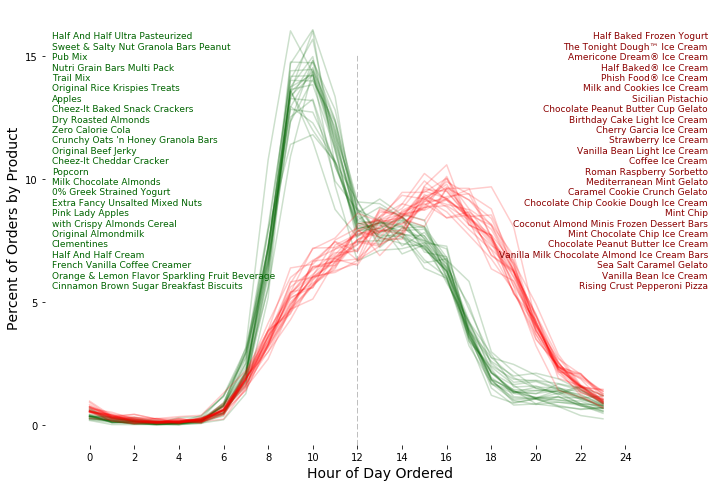

In [5]:
plt.rc('lines', antialiased=True, linewidth=1.5)
fig, ax = plt.subplots(figsize=(12, 8))

morning_pct.groupby('product_name').plot(x='order_hour_of_day', 
                                         y='pct', 
                                         ax=ax, 
                                         legend=False,
                                         alpha=0.2,
                                         color='darkgreen',
                                        );
afternoon_pct.groupby('product_name').plot(x='order_hour_of_day', 
                                         y='pct', 
                                         ax=ax, 
                                         legend=False,
                                         alpha=0.2,
                                         color='red',
                                        );

# Aesthetics
# Margins
plt.margins(x=0.5, y=0.05)

# Hide spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Labels
label_font_size= 14
plt.xlabel('Hour of Day Ordered', fontsize=label_font_size);
plt.ylabel('Percent of Orders by Product', fontsize=label_font_size);

# Tick Range
tick_font_size = 10
ax.tick_params(labelsize=tick_font_size)
plt.xticks(range(0, 25, 2));
plt.yticks(range(0, 16, 5));
plt.xlim([-2, 24 + 4])

# Vertical line at noon
plt.axvline(x=12, ymax=0.9, alpha=0.5, color='gray', linestyle='dashed', linewidth=1.0);

# Text
text_font_size = 9
ax.text(0.01, 0.95, morning_product_names,
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes,
        color='darkgreen', fontsize=text_font_size);
ax.text(0.99, 0.95, afternoon_product_names,
        verticalalignment='top', horizontalalignment='right',
        transform=ax.transAxes,  # transform=fig.transFigure
        color='darkred', fontsize=text_font_size);